# Data Inspection

In [1]:
# Importing necessary Libraries for the project
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv("data/iris.csv")
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


# Data Profiling

In [3]:
type(df) # checking the type of df

pandas.core.frame.DataFrame

In [4]:
df.shape # shape of the DataFrame

(150, 6)

In [5]:
df.columns # checking the columns of the datasets

Index(['Id', 'SepalLengthCm', 'SepalWidthCm', 'PetalLengthCm', 'PetalWidthCm',
       'Species'],
      dtype='object')

In [6]:
df.Species.unique() # checking the unique types of the Species columns of the dataframe

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica'], dtype=object)

In [7]:
df.info() # overall information of the DataFrame such total rows and columns, null value, not null values, Datatypes of the columns,etc

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [8]:
df.describe() # overall view of the numerical data like mean, median, min, max, count, quartiles, etc

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [9]:
df.describe(include="object") # overview of the object data such mode, frequency, unique value

,Species
count,150
unique,3
top,Iris-setosa
freq,50


# Visualize Target Class

In [10]:
target = df["Species"].value_counts()
target_columns = ["Species" ]

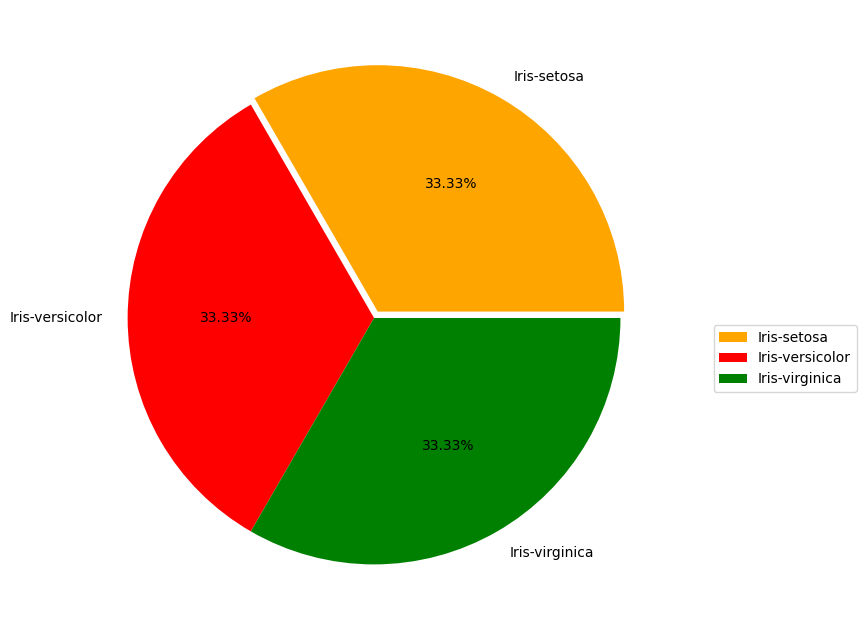

In [11]:
plt.figure(figsize=(10, 8))
plt.pie(target.values, labels=target.index, autopct="%.2f%%", explode=(0.03, 0, 0), colors=["orange", "red", "green"])
plt.legend(bbox_to_anchor=(1.04, 0.5))
plt.show()

In [12]:
df = df.drop("Id", axis=1) # dropping the Id from the DataFrames because it has no real meaning to the Target value

In [30]:
# sns.pairplot(df, hue="Species")   # pairplot of every columns in the DataFrame with the Species or Target Variable
# plt.show()

In [14]:
data = df.drop("Species", axis=1)  # creating the new DataFrame by dropping the Species columns from the original DataFrame
                                    # basically it is features or independent variable
labels = df["Species"] # Extracting the Labels or dependent variables from the DataFrame

In [15]:
labels.head() # checking the dependent variables

0    Iris-setosa
1    Iris-setosa
2    Iris-setosa
3    Iris-setosa
4    Iris-setosa
Name: Species, dtype: object

In [16]:
data.head() # checking the features variables

,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


# Splitting the data in train and test of both features and label

In [17]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data, labels, test_size = 0.2, random_state = 40) # splitting data with test size of 20% 

In [18]:
X_train.shape, X_test.shape, y_train.shape, y_test.shape  # checking the shape of all the train and test data

((120, 4), (30, 4), (120,), (30,))

# Model building with LinearRegression Algorithm

In [19]:
# Logestic regression
from sklearn.linear_model import LogisticRegression

classifier = LogisticRegression()  # making the model

In [20]:
classifier.fit(X_train, y_train)  # fitting the X and y train data

LogisticRegression()

In [21]:
# finding the coefficient of the model
m = classifier.coef_
m

array([[-0.38057115,  0.93526768, -2.35898106, -1.00640482],
       [ 0.58991809, -0.28497877, -0.21946242, -0.81820305],
       [-0.20934694, -0.65028891,  2.57844348,  1.82460788]])

In [22]:
# finding the intercept of the model
c = classifier.intercept_
c

array([  9.06045224,   1.49461513, -10.55506737])

### Predicting the model using test data of features

In [23]:
y_pred = classifier.predict(X_test)
y_pred

array(['Iris-setosa', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-versicolor', 'Iris-versicolor', 'Iris-versicolor',
       'Iris-setosa', 'Iris-versicolor', 'Iris-setosa', 'Iris-setosa',
       'Iris-virginica', 'Iris-versicolor', 'Iris-virginica',
       'Iris-virginica', 'Iris-virginica', 'Iris-versicolor',
       'Iris-versicolor', 'Iris-virginica', 'Iris-virginica',
       'Iris-versicolor', 'Iris-setosa', 'Iris-versicolor', 'Iris-setosa',
       'Iris-setosa', 'Iris-virginica', 'Iris-setosa', 'Iris-versicolor'],
      dtype=object)

In [24]:
y_test

38         Iris-setosa
66     Iris-versicolor
115     Iris-virginica
117     Iris-virginica
89     Iris-versicolor
136     Iris-virginica
68     Iris-versicolor
94     Iris-versicolor
84     Iris-versicolor
28         Iris-setosa
90     Iris-versicolor
11         Iris-setosa
40         Iris-setosa
126     Iris-virginica
79     Iris-versicolor
144     Iris-virginica
123     Iris-virginica
124     Iris-virginica
76     Iris-versicolor
59     Iris-versicolor
132     Iris-virginica
105     Iris-virginica
53     Iris-versicolor
17         Iris-setosa
64     Iris-versicolor
18         Iris-setosa
13         Iris-setosa
116     Iris-virginica
9          Iris-setosa
81     Iris-versicolor
Name: Species, dtype: object

# Performance metrics in classification

In [25]:
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
cm = confusion_matrix(y_true=y_test, y_pred=y_pred)
print(cm)
cm[:, :1 ]

[[ 8  0  0]
 [ 0 12  0]
 [ 0  0 10]]


array([[8],
       [0],
       [0]], dtype=int64)

In [34]:
# dis = ConfusionMatrixDisplay(confusion_matrix=cm)
# dis.plot()
# plt.show()

In [33]:
# ConfusionMatrixDisplay.from_estimator(classifier, X_test, y_test, cmap="Blues")

In [32]:
# from sklearn.metrics import classification_report, f1_score, precision_score
# print(classification_report(y_true=y_test, y_pred=y_pred))

In [31]:
# pre = precision_score(y_test, y_pred)

In [38]:
y_test

38         Iris-setosa
66     Iris-versicolor
115     Iris-virginica
117     Iris-virginica
89     Iris-versicolor
136     Iris-virginica
68     Iris-versicolor
94     Iris-versicolor
84     Iris-versicolor
28         Iris-setosa
90     Iris-versicolor
11         Iris-setosa
40         Iris-setosa
126     Iris-virginica
79     Iris-versicolor
144     Iris-virginica
123     Iris-virginica
124     Iris-virginica
76     Iris-versicolor
59     Iris-versicolor
132     Iris-virginica
105     Iris-virginica
53     Iris-versicolor
17         Iris-setosa
64     Iris-versicolor
18         Iris-setosa
13         Iris-setosa
116     Iris-virginica
9          Iris-setosa
81     Iris-versicolor
Name: Species, dtype: object